# Анализ MERGE+INSERTION SORT

## Тестирующая программа

Подробнее можно посмотреть [здесь](analyze/)

На выходе получем [файл](analyze/data.csv), содержащий следующие данные:

- `n`
- `merge_random`
- `merge_reversed`
- `merge_nearly`
- `merge_insert_5_random`
- `merge_insert_5_reversed`
- `merge_insert_5_nearly`
- `merge_insert_10_random`
- `merge_insert_10_reversed`
- `merge_insert_10_nearly`
- `merge_insert_20_random`
- `merge_insert_20_reversed`
- `merge_insert_20_nearly`
- `merge_insert_30_random`
- `merge_insert_30_reversed`
- `merge_insert_30_nearly`
- `merge_insert_50_random`
- `merge_insert_50_reversed`
- `merge_insert_50_nearly`
- `merge_insert_100_random`
- `merge_insert_100_reversed`
- `merge_insert_100_nearly`
- `merge_insert_200_random`
- `merge_insert_200_reversed`
- `merge_insert_200_nearly`
- `merge_insert_400_random`
- `merge_insert_400_reversed`
- `merge_insert_400_nearly`

То есть каждая строка содержит временные оценки для конкретного `n`


## Анализ

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme("paper")

### Считывание данных

In [13]:
df = pd.read_csv("analyze/data.csv",
                 sep=' ',
                 names=["n",
                        "merge_random",
                        "merge_reversed",
                        "merge_nearly",
                        "merge_insert_5_random",
                        "merge_insert_5_reversed",
                        "merge_insert_5_nearly",
                        
                        "merge_insert_10_random",
                        "merge_insert_10_reversed",
                        "merge_insert_10_nearly",

                        "merge_insert_20_random",
                        "merge_insert_20_reversed",
                        "merge_insert_20_nearly",
                        
                        "merge_insert_30_random",
                        "merge_insert_30_reversed",
                        "merge_insert_30_nearly",
                        
                        "merge_insert_50_random",
                        "merge_insert_50_reversed",
                        "merge_insert_50_nearly",
                        
                        "merge_insert_100_random",
                        "merge_insert_100_reversed",
                        "merge_insert_100_nearly",
                        
                        "merge_insert_200_random",
                        "merge_insert_200_reversed",
                        "merge_insert_200_nearly",
                        
                        "merge_insert_400_random",
                        "merge_insert_400_reversed",
                        "merge_insert_400_nearly"],
                 index_col=0)
df

,merge_random,merge_reversed,merge_nearly,merge_insert_5_random,merge_insert_5_reversed,merge_insert_5_nearly,merge_insert_10_random,merge_insert_10_reversed,merge_insert_10_nearly,merge_insert_20_random,...,merge_insert_50_nearly,merge_insert_100_random,merge_insert_100_reversed,merge_insert_100_nearly,merge_insert_200_random,merge_insert_200_reversed,merge_insert_200_nearly,merge_insert_400_random,merge_insert_400_reversed,merge_insert_400_nearly
n,,,,,,,,,,,,,,,,,,,,,
500,3049.00,2840.33,2830.67,958.667,880.667,890.00,640.000,569.667,587.000,458.000,...,268.000,245.333,249.333,183.000,215.667,282.000,119.333,238.667,413.333,65.3333
600,3082.00,2907.00,2939.33,976.667,890.667,923.00,664.333,585.000,616.333,479.667,...,309.333,285.000,302.000,210.333,269.333,364.333,145.667,328.333,572.000,76.6667
700,3348.00,3284.33,3237.67,1255.330,1187.000,1231.33,1021.330,891.000,952.667,694.000,...,336.333,338.000,370.667,250.333,333.333,468.333,165.333,424.667,749.333,91.3333
800,4194.00,3960.00,4263.33,1809.670,1667.670,1683.67,1143.330,1032.670,1082.670,854.000,...,397.667,403.000,451.000,273.667,415.667,615.333,191.333,550.333,981.667,111.3330
900,4622.67,4435.00,4486.00,1748.670,1621.330,1617.00,1152.670,1017.670,1094.330,825.000,...,577.333,512.333,499.667,423.667,448.333,537.000,312.000,475.667,745.667,214.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9600,52220.70,49399.70,50441.70,19837.300,17459.700,18407.30,14632.300,12464.700,13379.700,11664.300,...,8467.670,8599.000,7900.670,7073.000,8296.670,8916.330,5962.670,9819.000,12535.300,4994.6700
9700,52441.30,49650.00,50328.00,19763.700,17399.300,18400.00,14772.300,14576.300,13509.700,11701.700,...,8518.670,8674.670,7994.330,7115.330,8424.670,9030.670,6020.670,9305.330,12184.000,5059.6700
9800,53033.70,50786.70,51261.70,20063.300,19260.000,18790.00,14899.300,12674.300,13580.700,11799.700,...,8614.670,8774.000,8096.670,7190.000,8551.670,9165.670,5989.000,9461.330,12405.000,5122.0000


### Построение графиков

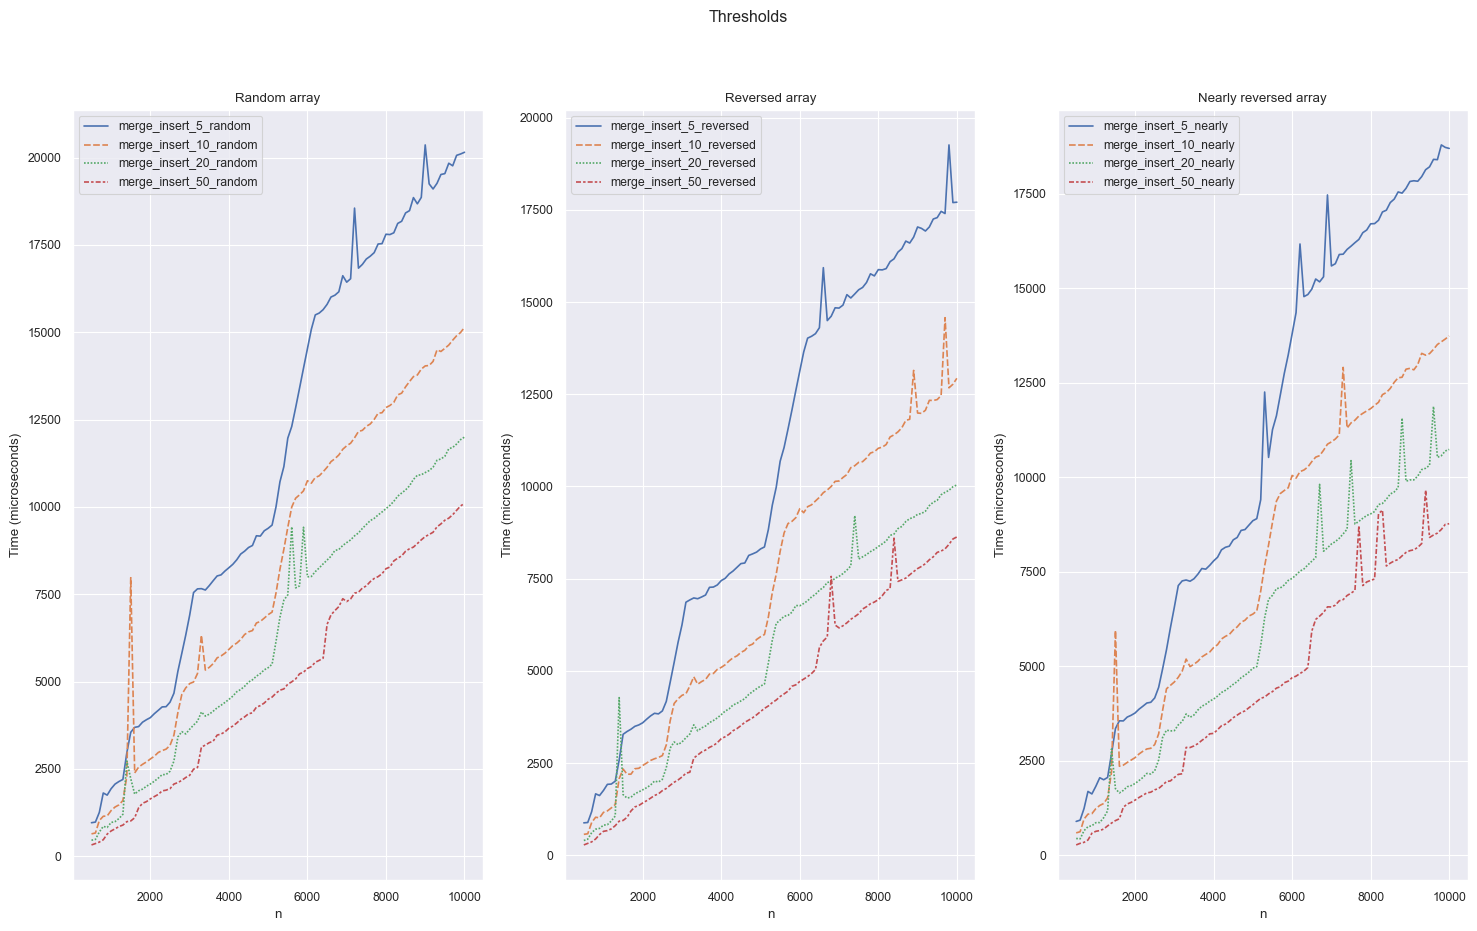

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(18, 10))
fig.suptitle("Thresholds")

sns.lineplot(data=df[["merge_insert_5_random", "merge_insert_10_random", "merge_insert_20_random", "merge_insert_50_random"]], ax=axes[0])
sns.lineplot(data=df[["merge_insert_5_reversed", "merge_insert_10_reversed", "merge_insert_20_reversed", "merge_insert_50_reversed"]], ax=axes[1])
sns.lineplot(data=df[["merge_insert_5_nearly", "merge_insert_10_nearly", "merge_insert_20_nearly", "merge_insert_50_nearly"]], ax=axes[2])

axes[0].set_title("Random array")
axes[1].set_title("Reversed array")
axes[2].set_title("Nearly reversed array")

axes[0].set_ylabel("Time (microseconds)")
axes[1].set_ylabel("Time (microseconds)")
axes[2].set_ylabel("Time (microseconds)")

fig.savefig("static/thresholds_analysis_small_values.png")


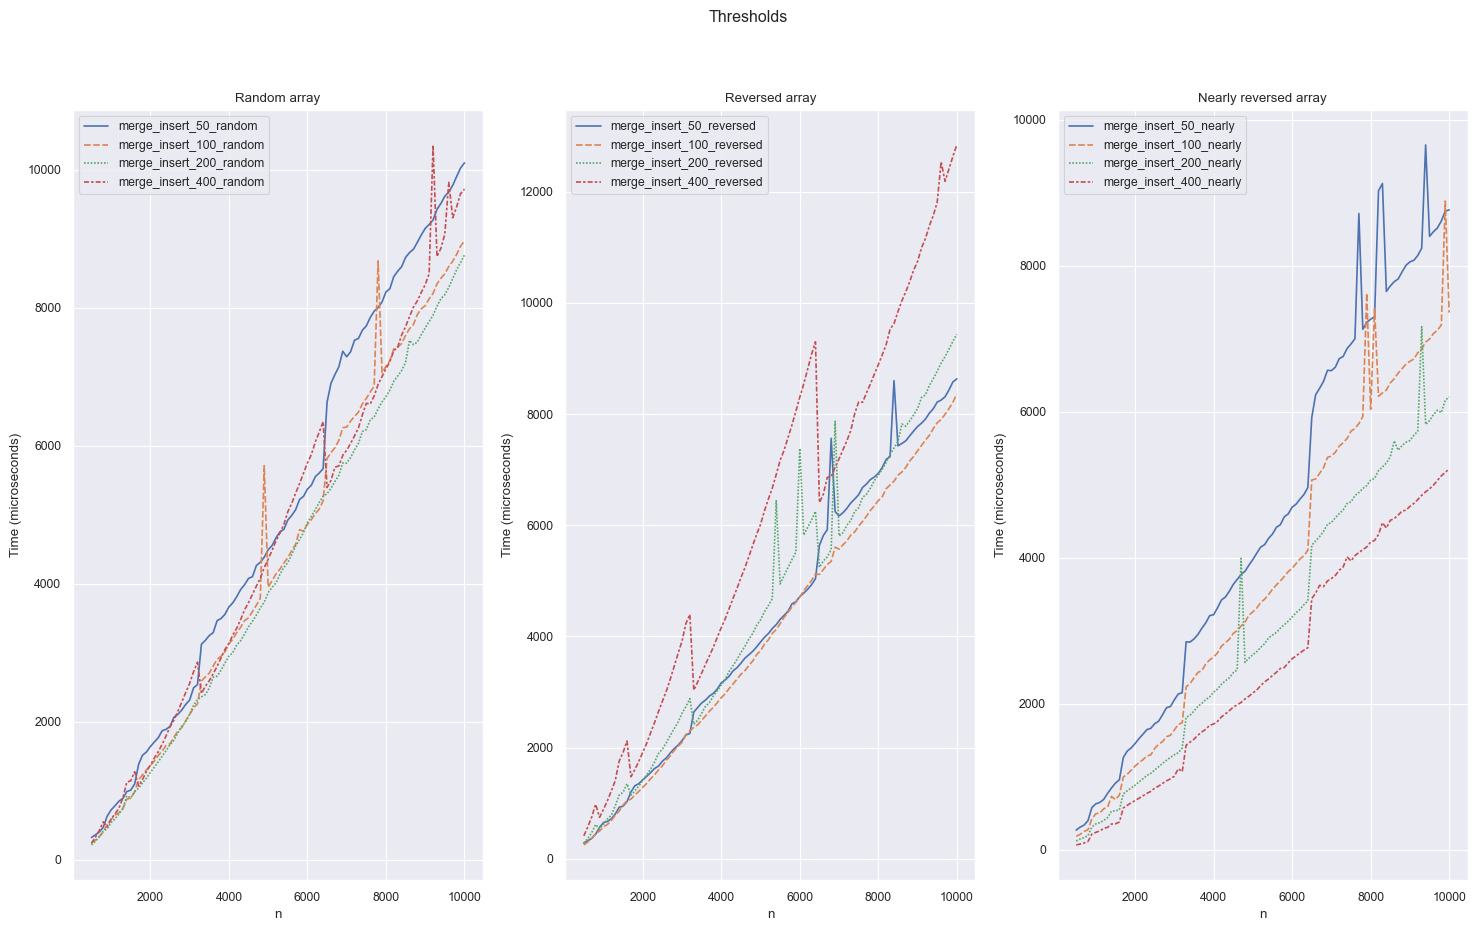

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(18, 10))
fig.suptitle("Thresholds")

sns.lineplot(data=df[["merge_insert_50_random", "merge_insert_100_random", "merge_insert_200_random", "merge_insert_400_random"]], ax=axes[0])
sns.lineplot(data=df[["merge_insert_50_reversed", "merge_insert_100_reversed", "merge_insert_200_reversed", "merge_insert_400_reversed"]], ax=axes[1])
sns.lineplot(data=df[["merge_insert_50_nearly", "merge_insert_100_nearly", "merge_insert_200_nearly", "merge_insert_400_nearly"]], ax=axes[2])

axes[0].set_title("Random array")
axes[1].set_title("Reversed array")
axes[2].set_title("Nearly reversed array")

axes[0].set_ylabel("Time (microseconds)")
axes[1].set_ylabel("Time (microseconds)")
axes[2].set_ylabel("Time (microseconds)")

fig.savefig("static/thresholds_analysis_big_values.png")


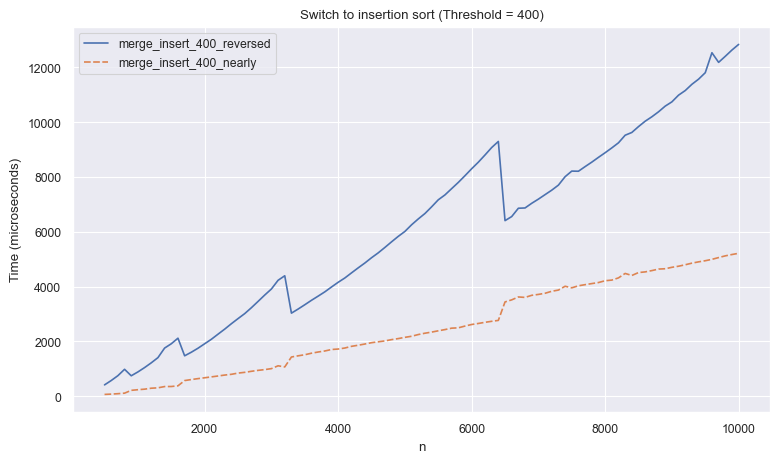

In [33]:
fig = plt.figure(figsize=(9, 5))
plt.title("Switch to insertion sort (Threshold = 400)")

sns.lineplot(data=df[["merge_insert_400_reversed", "merge_insert_400_nearly"]])
plt.xlabel('n')
plt.ylabel('Time (microseconds)')
plt.show()

fig.savefig("static/switch_to_insertion_sort.png")

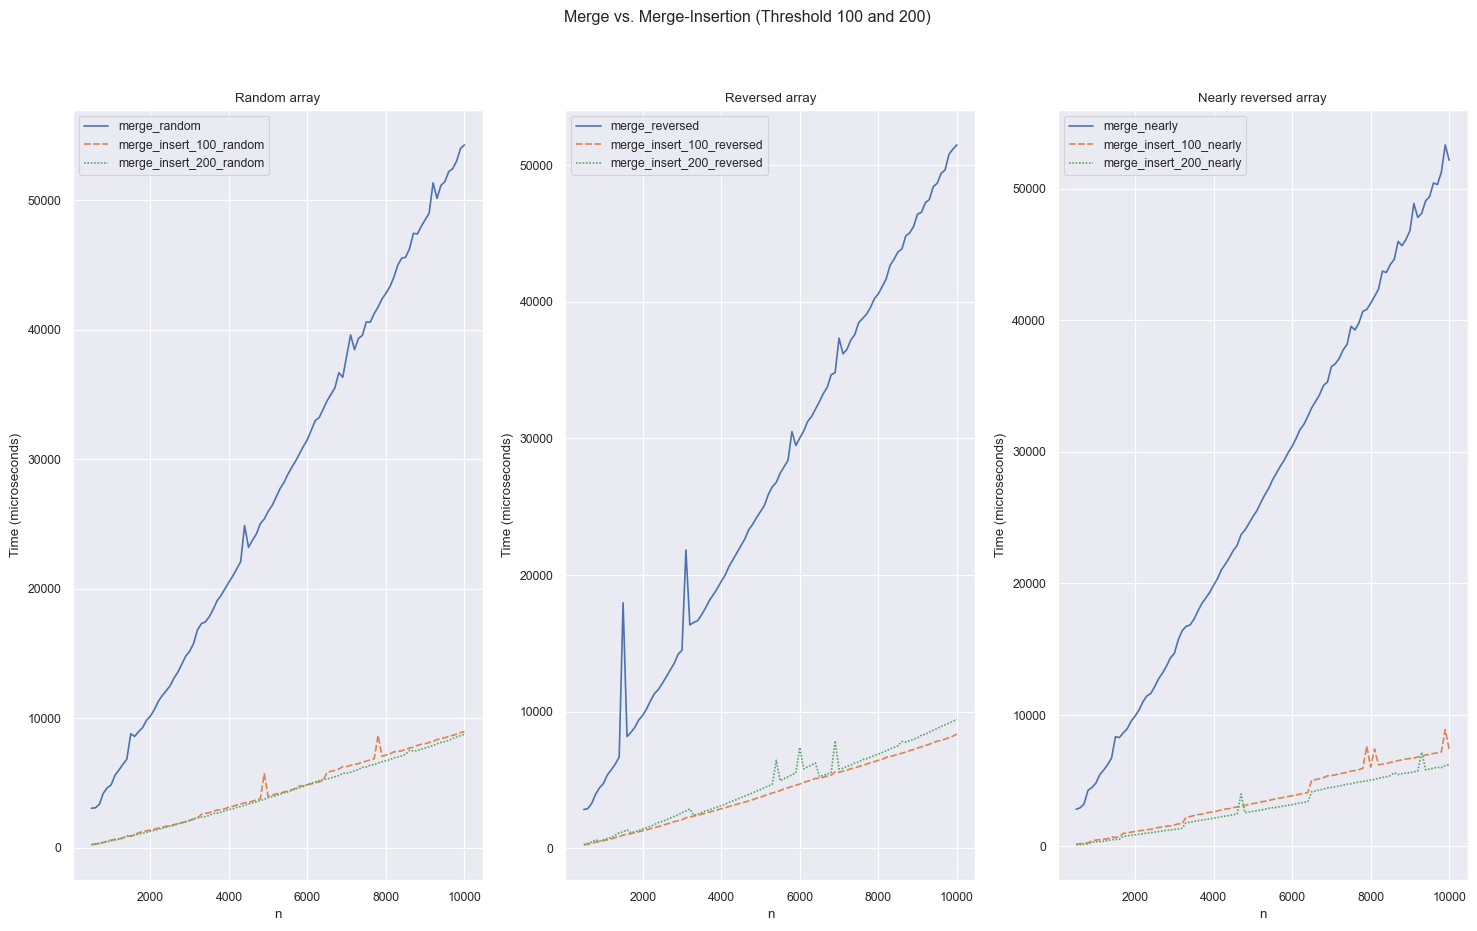

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(18, 10))
fig.suptitle("Merge vs. Merge-Insertion (Threshold 100 and 200)")

sns.lineplot(data=df[["merge_random", "merge_insert_100_random", "merge_insert_200_random"]], ax=axes[0])
sns.lineplot(data=df[["merge_reversed", "merge_insert_100_reversed", "merge_insert_200_reversed"]], ax=axes[1])
sns.lineplot(data=df[["merge_nearly", "merge_insert_100_nearly", "merge_insert_200_nearly"]], ax=axes[2])

axes[0].set_title("Random array")
axes[1].set_title("Reversed array")
axes[2].set_title("Nearly reversed array")

axes[0].set_ylabel("Time (microseconds)")
axes[1].set_ylabel("Time (microseconds)")
axes[2].set_ylabel("Time (microseconds)")

fig.savefig("static/merge_vs_merge_insertion.png")

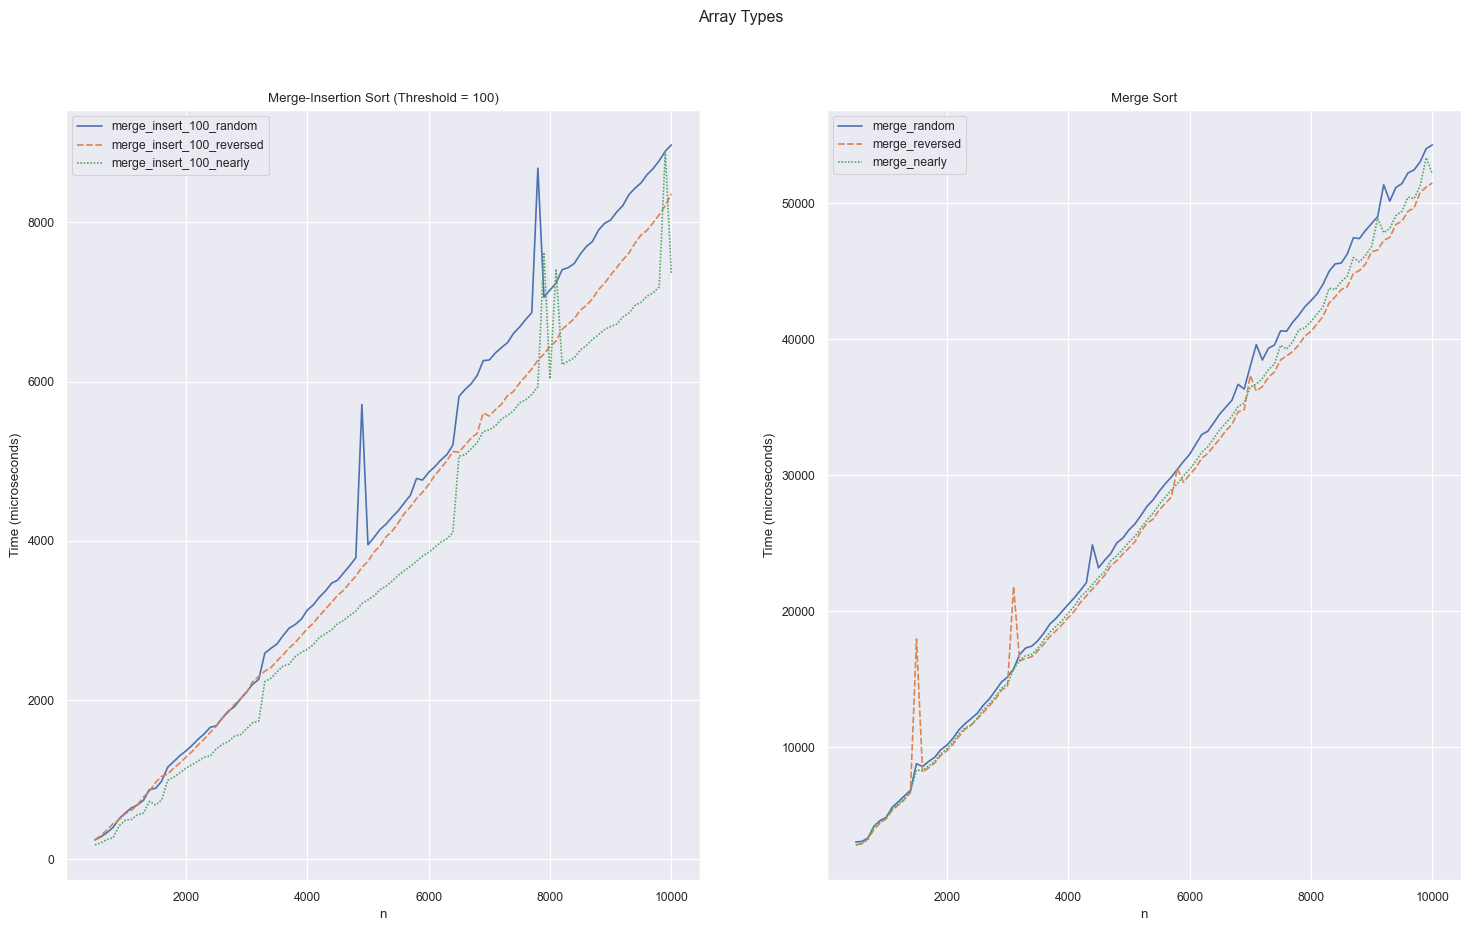

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle("Array Types")

sns.lineplot(data=df[["merge_insert_100_random", "merge_insert_100_reversed", "merge_insert_100_nearly"]], ax=axes[0])
sns.lineplot(data=df[["merge_random", "merge_reversed", "merge_nearly"]], ax=axes[1])

axes[0].set_title("Merge-Insertion Sort (Threshold = 100)")
axes[1].set_title("Merge Sort")

axes[0].set_ylabel("Time (microseconds)")
axes[1].set_ylabel("Time (microseconds)")

fig.savefig("static/array_types.png")